In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [2]:
data  = pd.read_csv("data_for_lr.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Data Processing

In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
data = data.dropna()
print("shape of the data",data.shape)

shape of the data (699, 2)


### Splitting Data

In [6]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
# validation of data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [7]:
print(f"trainging input data shape={train_input.shape}")
print(f"trainging output data shape={train_output.shape}")
print(f"testing input data shape={test_input.shape}")
print(f"testing output data shape={test_output.shape}")

trainging input data shape=(500, 1)
trainging output data shape=(500, 1)
testing input data shape=(199, 1)
testing output data shape=(199, 1)


<font color="red" size='10px'><b>Linear Regression</b> </font>

forward propagation

f(x) = m*x + c

In [8]:
def forward_propagation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m,train_input)+c
    return predictions

<font color="red" size='50px'><b>Cost Function</b> </font>

summation(1/2n*(y-f(x))^2)

In [9]:
def cost_function(predictions,train_output):
    cost = ((train_output - predictions)**2)*0.5
    return cost

<font color="red" size='40px'><b>Gradient Descent for Backpropagation</b> </font>

1. **df = summ((f(x)) - y)/n**
2. **dm = df * x**
3. **dc = df * 1**

**(d(cost)/dm = d(cost)/df * df/dm)**

In [10]:
def backward_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives

Update Parameters

In [11]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"] -learning_rate * derivatives["dm"]
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dc"]
    return parameters

<font color="red" size='50px'><b>Model Training</b> </font>

In [12]:
def train(train_input,train_output,learning_rate,iters):
    parameters = dict()

    # random parameters
    parameters["m"] = np.random.uniform(0,1) -1
    parameters["c"] = np.random.uniform(0,1) - 1
    
    plt.figure()

    # loss
    loss = list()
    # iteration
    for i in range(iters):

        # forward propagation
        predictions =forward_propagation(train_input,parameters)

        # cost
        cost = cost_function(predictions,train_output)

        loss.append(cost)
        print(f"iteration ={i+1},loss={cost}")

        #plot
        fig,ax = plt.subplots()
        ax.plot(train_input,train_output,"+",label ="Original")
        ax.plot(train_input,predictions,"+",label ="Training")
        legend = ax.legend()
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predictions,"+",label="Original")
        plt.show()

        # backpropagation
        derivatives = backward_propagation(train_input,train_output,predictions)

        # update parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)

    return parameters

### Training

iteration =1,loss=[[8.55278630e+02]
 [3.88688905e+03]
 [4.43875666e+02]
 [2.28806217e+03]
 [1.24392091e+04]
 [1.91687081e+03]
 [2.19376242e+02]
 [1.07137570e+04]
 [1.02266127e+03]
 [6.61621263e+01]
 [3.03016372e+02]
 [3.62156426e+02]
 [9.86242661e+02]
 [2.53933714e+03]
 [4.26488400e+03]
 [6.09851475e+03]
 [1.16862310e+03]
 [8.39729375e+03]
 [1.41345274e+03]
 [1.28747663e+03]
 [7.71279212e+03]
 [1.20799888e+04]
 [5.42641785e+03]
 [4.46620273e+03]
 [1.14090633e+04]
 [5.42792060e+03]
 [3.85966719e+03]
 [8.37921427e+02]
 [1.40341247e+04]
 [3.79642465e+03]
 [5.85099442e+01]
 [9.07613885e+02]
 [2.93430184e+03]
 [3.61847619e-01]
 [6.12328217e+03]
 [1.38509827e+04]
 [2.54312131e+03]
 [7.37298268e+01]
 [7.99544619e+02]
 [6.76876320e+03]
 [1.17131870e+04]
 [2.92381166e-01]
 [5.94885023e+03]
 [7.12586733e+02]
 [1.99176947e+03]
 [5.57799995e+02]
 [5.67118428e+03]
 [4.44927585e+03]
 [7.19247034e+02]
 [1.92926315e+03]
 [1.20157335e+04]
 [3.08229403e+03]
 [3.73082673e+01]
 [5.95800592e+03]
 [4.345238

<Figure size 640x480 with 0 Axes>

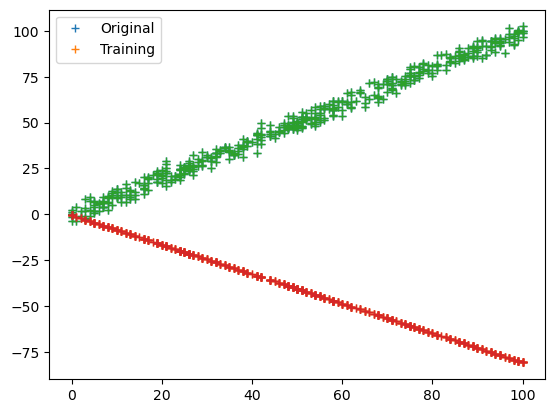

iteration =2,loss=[[3.63837323e+02]
 [1.69382572e+03]
 [2.16434564e+02]
 [1.00680561e+03]
 [5.57451577e+03]
 [8.13740829e+02]
 [9.45958880e+01]
 [4.78606807e+03]
 [4.57304219e+02]
 [3.61817873e+01]
 [1.12932014e+02]
 [1.50062256e+02]
 [4.50877395e+02]
 [1.14680893e+03]
 [1.79964041e+03]
 [2.77375186e+03]
 [5.36707602e+02]
 [3.68462259e+03]
 [6.40414206e+02]
 [5.17306136e+02]
 [3.48167586e+03]
 [5.33491174e+03]
 [2.40935772e+03]
 [1.93122842e+03]
 [5.07172189e+03]
 [2.41035909e+03]
 [1.71074803e+03]
 [4.19076175e+02]
 [6.45224382e+03]
 [1.70353313e+03]
 [3.54510071e+01]
 [3.81507924e+02]
 [1.32282050e+03]
 [3.61847619e-01]
 [2.79046335e+03]
 [6.12760476e+03]
 [1.14935245e+03]
 [3.15863622e+01]
 [3.75465088e+02]
 [2.85751373e+03]
 [5.27515816e+03]
 [2.92381166e-01]
 [2.76147885e+03]
 [3.47545564e+02]
 [8.62791000e+02]
 [2.42301711e+02]
 [2.53054018e+03]
 [2.03313608e+03]
 [3.52201606e+02]
 [8.96329725e+02]
 [5.41627276e+03]
 [1.35956373e+03]
 [1.59134676e+01]
 [2.72330859e+03]
 [2.223788

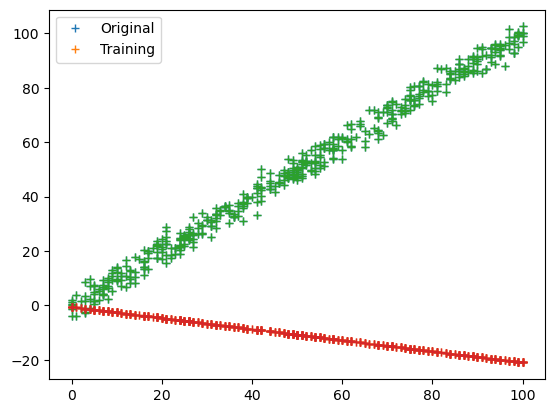

iteration =3,loss=[[1.50635092e+02]
 [7.28298540e+02]
 [1.09432166e+02]
 [4.39391982e+02]
 [2.50084342e+03]
 [3.35783114e+02]
 [4.00113941e+01]
 [2.13697812e+03]
 [2.04493403e+02]
 [2.11436194e+01]
 [3.71226173e+01]
 [5.95347385e+01]
 [2.08302897e+02]
 [5.20417632e+02]
 [7.35469081e+02]
 [1.27188467e+03]
 [2.49608873e+02]
 [1.60113586e+03]
 [2.92010827e+02]
 [1.94868157e+02]
 [1.57892917e+03]
 [2.34122762e+03]
 [1.06596011e+03]
 [8.20427659e+02]
 [2.24789042e+03]
 [1.06662621e+03]
 [7.54901176e+02]
 [2.19149748e+02]
 [3.00539329e+03]
 [7.65713942e+02]
 [2.32376663e+01]
 [1.54944595e+02]
 [5.98709908e+02]
 [3.61847619e-01]
 [1.28320909e+03]
 [2.69615156e+03]
 [5.22131519e+02]
 [1.32241292e+01]
 [1.80254698e+02]
 [1.16866426e+03]
 [2.38399625e+03]
 [2.92381166e-01]
 [1.30419288e+03]
 [1.75782870e+02]
 [3.67548217e+02]
 [1.03668702e+02]
 [1.12794741e+03]
 [9.38676077e+02]
 [1.79098650e+02]
 [4.23830974e+02]
 [2.45102711e+03]
 [5.95528280e+02]
 [6.61651163e+00]
 [1.25782176e+03]
 [1.197934

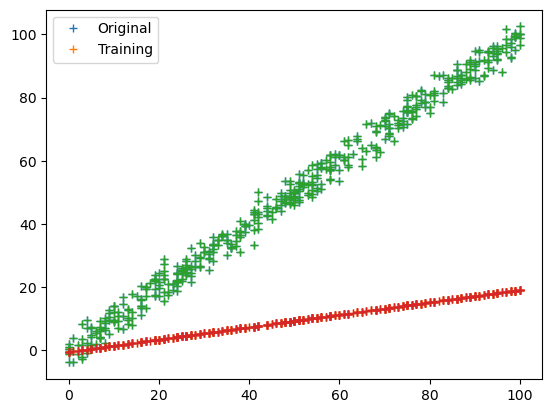

iteration =4,loss=[[5.96811337e+01]
 [3.06670947e+02]
 [5.80413574e+01]
 [1.89356619e+02]
 [1.12372190e+03]
 [1.32305145e+02]
 [1.64143272e+01]
 [9.53450061e+02]
 [9.14438350e+01]
 [1.33277621e+01]
 [9.36873176e+00]
 [2.19387401e+01]
 [9.77074930e+01]
 [2.37843524e+02]
 [2.85155589e+02]
 [5.90174695e+02]
 [1.18200890e+02]
 [6.85430059e+02]
 [1.34393791e+02]
 [6.53676853e+01]
 [7.20909800e+02]
 [1.01759480e+03]
 [4.69071697e+02]
 [3.38932730e+02]
 [9.91868867e+02]
 [4.69513596e+02]
 [3.30875398e+02]
 [1.21301889e+02]
 [1.42630824e+03]
 [3.45051135e+02]
 [1.65042926e+01]
 [5.94469112e+01]
 [2.72565666e+02]
 [3.61847619e-01]
 [5.97896743e+02]
 [1.17655924e+03]
 [2.39002629e+02]
 [5.33610842e+00]
 [8.92345348e+01]
 [4.53679504e+02]
 [1.08295035e+03]
 [2.92381166e-01]
 [6.31146505e+02]
 [9.32734747e+01]
 [1.52511599e+02]
 [4.33133640e+01]
 [5.01959258e+02]
 [4.39880881e+02]
 [9.56930117e+01]
 [2.05453986e+02]
 [1.11558514e+03]
 [2.58099077e+02]
 [2.63984403e+00]
 [5.89775884e+02]
 [6.875768

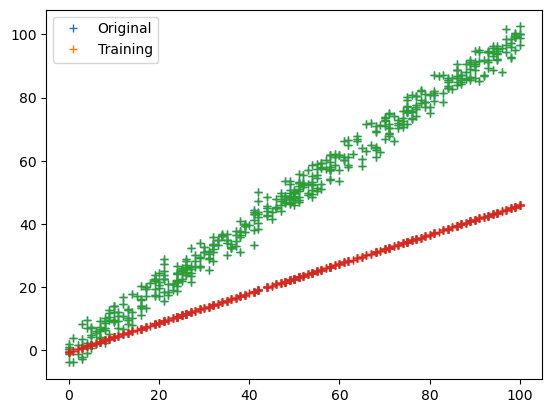

iteration =5,loss=[[2.19406181e+01]
 [1.24903712e+02]
 [3.26919889e+01]
 [8.00190845e+01]
 [5.06130256e+02]
 [4.81703258e+01]
 [6.40506148e+00]
 [4.24923923e+02]
 [4.08913184e+01]
 [9.10302373e+00]
 [1.06775355e+00]
 [7.05627016e+00]
 [4.68326008e+01]
 [1.09832584e+02]
 [1.00875535e+02]
 [2.78566895e+02]
 [5.74156040e+01]
 [2.86630786e+02]
 [6.26940813e+01]
 [1.72782769e+01]
 [3.32435620e+02]
 [4.35771434e+02]
 [2.04727870e+02]
 [1.33801424e+02]
 [4.34701088e+02]
 [2.05019844e+02]
 [1.43537425e+02]
 [7.18988282e+01]
 [6.94939981e+02]
 [1.56075092e+02]
 [1.26427774e+01]
 [2.06314656e+01]
 [1.25156381e+02]
 [3.61847619e-01]
 [2.83880013e+02]
 [5.06973313e+02]
 [1.10620702e+02]
 [2.02482434e+00]
 [4.60401262e+01]
 [1.60853600e+02]
 [4.95674468e+02]
 [2.92381166e-01]
 [3.15875298e+02]
 [5.25645758e+01]
 [6.06474279e+01]
 [1.74190433e+01]
 [2.22844560e+02]
 [2.10558314e+02]
 [5.43847886e+01]
 [1.03061333e+02]
 [5.12080391e+02]
 [1.10035716e+02]
 [9.82399505e-01]
 [2.82536888e+02]
 [4.248365

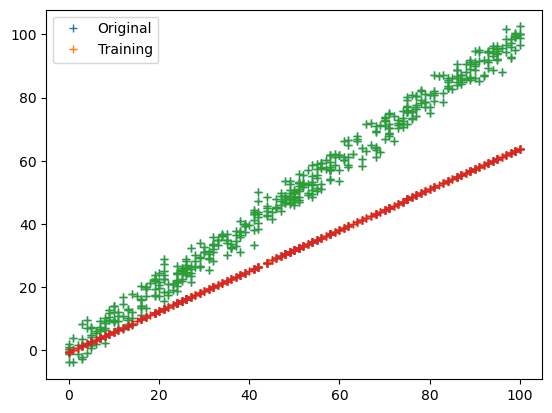

iteration =6,loss=[[7.02440141e+00]
 [4.81512591e+01]
 [1.97723782e+01]
 [3.27788069e+01]
 [2.28768480e+02]
 [1.51313268e+01]
 [2.29207786e+00]
 [1.89058899e+02]
 [1.82856379e+01]
 [6.72587683e+00]
 [1.04002036e-01]
 [1.69142772e+00]
 [2.31333319e+01]
 [5.14850008e+01]
 [2.98968965e+01]
 [1.34699627e+02]
 [2.88810474e+01]
 [1.15439285e+02]
 [2.98175472e+01]
 [2.34035829e+00]
 [1.55515940e+02]
 [1.82328163e+02]
 [8.82375614e+01]
 [4.88794036e+01]
 [1.88552921e+02]
 [8.84292797e+01]
 [6.12858326e+01]
 [4.60301028e+01]
 [3.51009761e+02]
 [7.09900017e+01]
 [1.03472527e+01]
 [5.87444895e+00]
 [5.81912154e+01]
 [3.61847619e-01]
 [1.38401876e+02]
 [2.14194721e+02]
 [5.20250381e+01]
 [6.88558293e-01]
 [2.50578353e+01]
 [4.78946096e+01]
 [2.29392794e+02]
 [2.92381166e-01]
 [1.65329483e+02]
 [3.18108719e+01]
 [2.24397556e+01]
 [6.57195436e+00]
 [9.85733448e+01]
 [1.03815049e+02]
 [3.32303122e+01]
 [5.41040300e+01]
 [2.37974611e+02]
 [4.57151721e+01]
 [3.22020468e-01]
 [1.39458752e+02]
 [2.842606

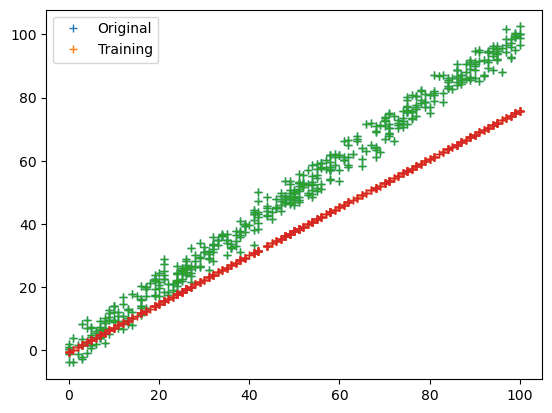

iteration =7,loss=[[1.66511609e+00]
 [1.68580083e+01]
 [1.29357915e+01]
 [1.27591843e+01]
 [1.03942539e+02]
 [3.42232678e+00]
 [6.95520146e-01]
 [8.39053678e+01]
 [8.17697345e+00]
 [5.33657826e+00]
 [1.51077721e+00]
 [1.55161702e-01]
 [1.19007564e+01]
 [2.46548185e+01]
 [5.79790680e+00]
 [6.73401503e+01]
 [1.52163469e+01]
 [4.36617980e+01]
 [1.45714250e+01]
 [5.14375341e-02]
 [7.42590483e+01]
 [7.34967004e+01]
 [3.72942651e+01]
 [1.54563738e+01]
 [8.04892477e+01]
 [3.74189416e+01]
 [2.55220141e+01]
 [3.19365666e+01]
 [1.85923749e+02]
 [3.25541743e+01]
 [8.94042146e+00]
 [1.01424253e+00]
 [2.75454717e+01]
 [3.61847619e-01]
 [6.99651992e+01]
 [8.77131247e+01]
 [2.50289620e+01]
 [1.87608251e-01]
 [1.45604124e+01]
 [9.40869189e+00]
 [1.07865700e+02]
 [2.92381166e-01]
 [9.16130249e+01]
 [2.08252934e+01]
 [7.27442653e+00]
 [2.21100069e+00]
 [4.33643823e+01]
 [5.32760069e+01]
 [2.19767343e+01]
 [3.00917234e+01]
 [1.12569621e+02]
 [1.82160843e+01]
 [8.07369266e-02]
 [7.16734666e+01]
 [2.059614

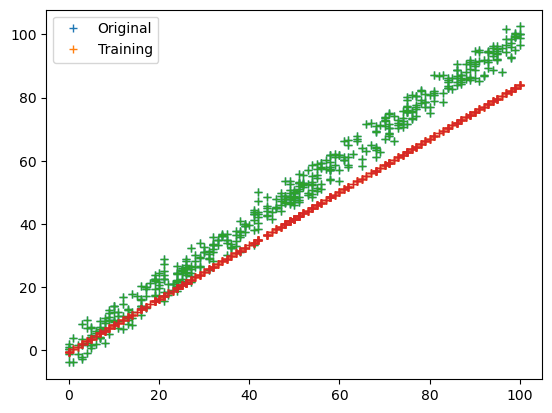

iteration =8,loss=[[1.45142267e-01]
 [4.88953332e+00]
 [9.17029603e+00]
 [4.54579770e+00]
 [4.75904038e+01]
 [2.36026557e-01]
 [1.43845221e-01]
 [3.70966309e+01]
 [3.65662352e+00]
 [4.49711977e+00]
 [3.36875071e+00]
 [4.51023777e-02]
 [6.45327108e+00]
 [1.21630541e+01]
 [1.30821820e-01]
 [3.51952510e+01]
 [8.50078396e+00]
 [1.47575829e+01]
 [7.38955218e+00]
 [1.96410085e+00]
 [3.64898588e+01]
 [2.78401871e+01]
 [1.52813915e+01]
 [3.55423618e+00]
 [3.35080722e+01]
 [1.53612366e+01]
 [1.02093195e+01]
 [2.39453250e+01]
 [1.04551996e+02]
 [1.51071352e+01]
 [8.05699158e+00]
 [3.57428187e-03]
 [1.33728875e+01]
 [3.61847619e-01]
 [3.70999687e+01]
 [3.41235007e+01]
 [1.24262632e+01]
 [2.81872735e-02]
 [9.12082150e+00]
 [2.40760735e-01]
 [5.18814381e+01]
 [2.92381166e-01]
 [5.43715738e+01]
 [1.47726278e+01]
 [1.77685419e+00]
 [5.88269372e-01]
 [1.89182402e+01]
 [2.87996173e+01]
 [1.57448555e+01]
 [1.79364286e+01]
 [5.45977122e+01]
 [6.76397080e+00]
 [8.96435589e-03]
 [3.88174465e+01]
 [1.606248

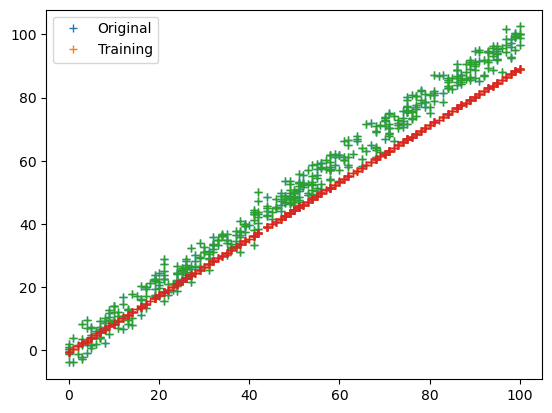

iteration =9,loss=[[5.16012974e-02]
 [8.91668161e-01]
 [7.01278070e+00]
 [1.36704699e+00]
 [2.20344987e+01]
 [1.81796717e-01]
 [5.65534420e-03]
 [1.63074313e+01]
 [1.63521803e+00]
 [3.97582324e+00]
 [5.02135830e+00]
 [3.81672235e-01]
 [3.73337492e+00]
 [6.24669194e+00]
 [1.01326343e+00]
 [1.94677034e+01]
 [5.09313678e+00]
 [3.96733577e+00]
 [3.93444586e+00]
 [4.78284225e+00]
 [1.86419771e+01]
 [9.43652149e+00]
 [5.95107930e+00]
 [2.67253160e-01]
 [1.33966587e+01]
 [6.00094545e+00]
 [3.81653116e+00]
 [1.92424107e+01]
 [6.31160699e+01]
 [7.13168038e+00]
 [7.49187112e+00]
 [3.29118206e-01]
 [6.72188754e+00]
 [3.61847619e-01]
 [2.08907304e+01]
 [1.21453003e+01]
 [6.43571852e+00]
 [8.99070646e-05]
 [6.18990518e+00]
 [1.51874639e+00]
 [2.57495958e+01]
 [2.92381166e-01]
 [3.48578023e+01]
 [1.13035667e+01]
 [1.77060048e-01]
 [8.15372657e-02]
 [8.14824313e+00]
 [1.65994435e+01]
 [1.21559533e+01]
 [1.15529088e+01]
 [2.74074909e+01]
 [2.20775041e+00]
 [1.02492353e-03]
 [2.24237035e+01]
 [1.334483

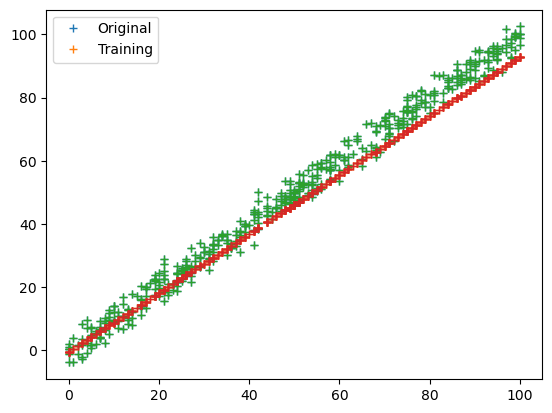

iteration =10,loss=[[4.01731821e-01]
 [9.42164909e-03]
 [5.73123860e+00]
 [2.75964465e-01]
 [1.03679810e+01]
 [1.07406743e+00]
 [1.64172897e-02]
 [7.10625031e+00]
 [7.31278302e-01]
 [3.64514004e+00]
 [6.30988313e+00]
 [7.90153164e-01]
 [2.32724282e+00]
 [3.38011652e+00]
 [3.69256133e+00]
 [1.15298418e+01]
 [3.29874681e+00]
 [5.69845179e-01]
 [2.22653582e+00]
 [7.35627479e+00]
 [1.00198899e+01]
 [2.55275780e+00]
 [2.12201015e+00]
 [1.58426796e-01]
 [5.00336669e+00]
 [2.15182911e+00]
 [1.26185256e+00]
 [1.63841227e+01]
 [4.12109089e+01]
 [3.44916451e+00]
 [7.12543438e+00]
 [9.94600448e-01]
 [3.53815476e+00]
 [3.61847619e-01]
 [1.26307588e+01]
 [3.64499822e+00]
 [3.51953665e+00]
 [1.64076280e-02]
 [4.54594002e+00]
 [5.68626434e+00]
 [1.33303997e+01]
 [2.92381166e-01]
 [2.42189806e+01]
 [9.24242330e+00]
 [3.58007820e-02]
 [1.32459714e-03]
 [3.44027238e+00]
 [1.03046167e+01]
 [1.00146713e+01]
 [8.06443019e+00]
 [1.44016312e+01]
 [5.48043225e-01]
 [1.36273150e-02]
 [1.39550934e+01]
 [1.16679

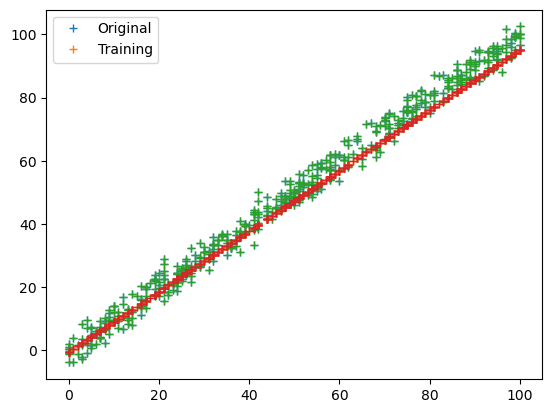

iteration =11,loss=[[8.20405372e-01]
 [2.20406484e-01]
 [4.94634761e+00]
 [8.97811198e-03]
 [4.99145110e+00]
 [2.08594747e+00]
 [6.97485672e-02]
 [3.05536599e+00]
 [3.27044656e-01]
 [3.43201930e+00]
 [7.25354618e+00]
 [1.14532452e+00]
 [1.57149090e+00]
 [1.95051452e+00]
 [6.41845454e+00]
 [7.37510377e+00]
 [2.31540204e+00]
 [5.22256343e-03]
 [1.35388347e+00]
 [9.38503261e+00]
 [5.73567408e+00]
 [3.74489945e-01]
 [6.39241593e-01]
 [1.01988124e+00]
 [1.65131157e+00]
 [6.55654851e-01]
 [3.22752425e-01]
 [1.46009169e+01]
 [2.91578461e+01]
 [1.72479463e+00]
 [6.88552158e+00]
 [1.63985057e+00]
 [1.97431964e+00]
 [3.61847619e-01]
 [8.26062349e+00]
 [7.31749683e-01]
 [2.05676247e+00]
 [4.30180143e-02]
 [3.58789616e+00]
 [9.95454966e+00]
 [7.28619356e+00]
 [2.92381166e-01]
 [1.81824814e+01]
 [7.97977898e+00]
 [3.56551878e-01]
 [6.33429058e-02]
 [1.40726043e+00]
 [6.92852851e+00]
 [8.69843771e+00]
 [6.08055296e+00]
 [8.01926309e+00]
 [5.84403215e-02]
 [3.00641192e-02]
 [9.40731479e+00]
 [1.06093

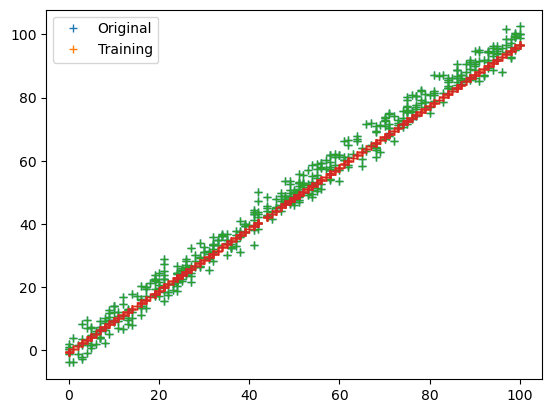

iteration =12,loss=[[1.18289546e+00]
 [7.19653574e-01]
 [4.45371976e+00]
 [3.73156381e-02]
 [2.48049208e+00]
 [2.94826908e+00]
 [1.26041593e-01]
 [1.28646561e+00]
 [1.46270709e-01]
 [3.29308553e+00]
 [7.92125604e+00]
 [1.41950575e+00]
 [1.14863422e+00]
 [1.21243393e+00]
 [8.65903680e+00]
 [5.11255096e+00]
 [1.75467878e+00]
 [3.91109235e-01]
 [8.90819593e-01]
 [1.08793543e+01]
 [3.53324090e+00]
 [2.23179975e-03]
 [1.29643693e-01]
 [2.01369986e+00]
 [4.20638996e-01]
 [1.37092463e-01]
 [3.87462749e-02]
 [1.34657800e+01]
 [2.22583147e+01]
 [9.01776341e-01]
 [6.72738238e+00]
 [2.16087398e+00]
 [1.18128954e+00]
 [3.61847619e-01]
 [5.85403296e+00]
 [2.27297859e-02]
 [1.29649939e+00]
 [6.78325074e-02]
 [3.01042476e+00]
 [1.34712355e+01]
 [4.25526021e+00]
 [2.92381166e-01]
 [1.46277711e+01]
 [7.18715794e+00]
 [7.56710595e-01]
 [1.56533301e-01]
 [5.46472702e-01]
 [5.04354371e+00]
 [7.86998114e+00]
 [4.90993447e+00]
 [4.78640999e+00]
 [8.39844752e-03]
 [4.46371286e-02]
 [6.86488450e+00]
 [9.92961

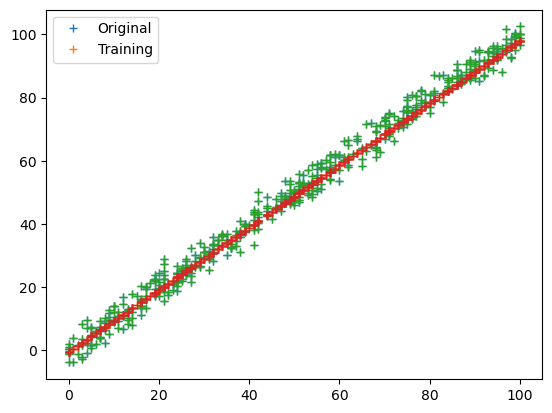

iteration =13,loss=[[1.46219563e+00]
 [1.21366187e+00]
 [4.13871021e+00]
 [1.48772504e-01]
 [1.28629058e+00]
 [3.60793575e+00]
 [1.72910255e-01]
 [5.23908288e-01]
 [6.54254107e-02]
 [3.20178110e+00]
 [8.38415863e+00]
 [1.61925291e+00]
 [9.02767357e-01]
 [8.16314351e-01]
 [1.03441388e+01]
 [3.83019337e+00]
 [1.42302587e+00]
 [9.90547583e-01]
 [6.35042650e-01]
 [1.19401828e+01]
 [2.35668653e+00]
 [2.38194968e-01]
 [4.38073906e-03]
 [2.86508202e+00]
 [4.97097981e-02]
 [5.83489235e-03]
 [2.64522263e-03]
 [1.27323310e+01]
 [1.81634609e+01]
 [4.99019853e-01]
 [6.62265858e+00]
 [2.54932562e+00]
 [7.63992210e-01]
 [3.61847619e-01]
 [4.47535631e+00]
 [1.02686275e-01]
 [8.85546230e-01]
 [8.75652377e-02]
 [2.65251738e+00]
 [1.61190973e+01]
 [2.68048366e+00]
 [2.92381166e-01]
 [1.24662195e+01]
 [6.68025338e+00]
 [1.10732561e+00]
 [2.41977229e-01]
 [1.93861983e-01]
 [3.94966936e+00]
 [7.33911310e+00]
 [4.19689836e+00]
 [3.08743495e+00]
 [9.89615717e-02]
 [5.59837866e-02]
 [5.38774729e+00]
 [9.48759

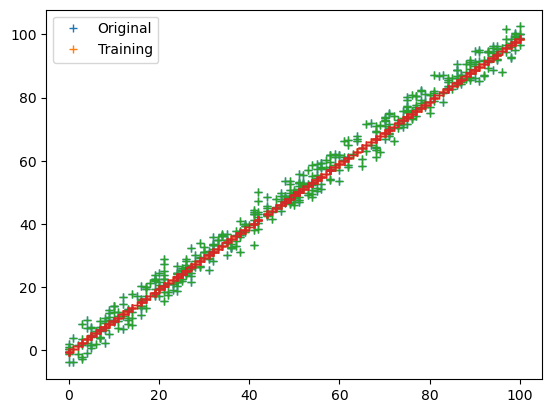

iteration =14,loss=[[1.66546641e+00]
 [1.61562659e+00]
 [3.93450665e+00]
 [2.64670965e-01]
 [7.04549545e-01]
 [4.08618628e+00]
 [2.08376854e-01]
 [2.01934520e-01]
 [2.92680326e-02]
 [3.14144134e+00]
 [8.70103859e+00]
 [1.76015894e+00]
 [7.54855161e-01]
 [5.94998618e-01]
 [1.15545136e+01]
 [3.07580128e+00]
 [1.22061263e+00]
 [1.54405687e+00]
 [4.88095001e-01]
 [1.26770963e+01]
 [1.70238046e+00]
 [6.12815347e-01]
 [1.69854376e-02]
 [3.51794242e+00]
 [3.80090579e-03]
 [1.44309470e-02]
 [4.72859426e-02]
 [1.22533273e+01]
 [1.56572443e+01]
 [2.95696672e-01]
 [6.55308737e+00]
 [2.82699049e+00]
 [5.35476012e-01]
 [3.61847619e-01]
 [3.65655497e+00]
 [4.03922763e-01]
 [6.54311172e-01]
 [1.02164366e-01]
 [2.42581552e+00]
 [1.80222058e+01]
 [1.82955338e+00]
 [2.92381166e-01]
 [1.11171434e+01]
 [6.35162426e+00]
 [1.37891106e+00]
 [3.09455811e-01]
 [5.77893082e-02]
 [3.29269888e+00]
 [6.99445944e+00]
 [3.75128270e+00]
 [2.15829361e+00]
 [2.14982624e-01]
 [6.42875567e-02]
 [4.49969566e+00]
 [9.19762

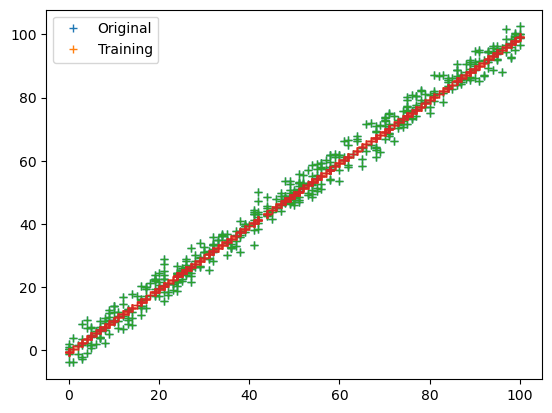

iteration =15,loss=[[1.80877367e+00]
 [1.91644858e+00]
 [3.80083654e+00]
 [3.60670909e-01]
 [4.12494900e-01]
 [4.42259776e+00]
 [2.33938280e-01]
 [7.06755191e-02]
 [1.30956565e-02]
 [3.10141197e+00]
 [8.91621789e+00]
 [1.85766321e+00]
 [6.63323837e-01]
 [4.66487381e-01]
 [1.24012543e+01]
 [2.61745028e+00]
 [1.09391709e+00]
 [1.98245762e+00]
 [4.00603358e-01]
 [1.31821862e+01]
 [1.32407527e+00]
 [9.60286464e-01]
 [6.85075224e-02]
 [3.99186917e+00]
 [6.34894815e-02]
 [6.32724228e-02]
 [1.07894603e-01]
 [1.19381381e+01]
 [1.40850812e+01]
 [1.89247505e-01]
 [6.50676956e+00]
 [3.02067331e+00]
 [4.05262631e-01]
 [3.61847619e-01]
 [3.15513303e+00]
 [7.16156469e-01]
 [5.19166812e-01]
 [1.12554604e-01]
 [2.27986762e+00]
 [1.93540621e+01]
 [1.35091836e+00]
 [2.92381166e-01]
 [1.02580997e+01]
 [6.13649206e+00]
 [1.57712413e+00]
 [3.59203678e-01]
 [1.13885464e-02]
 [2.88669711e+00]
 [6.76861150e+00]
 [3.46724652e+00]
 [1.62952320e+00]
 [3.17367123e-01]
 [7.01606005e-02]
 [3.95044116e+00]
 [9.00623

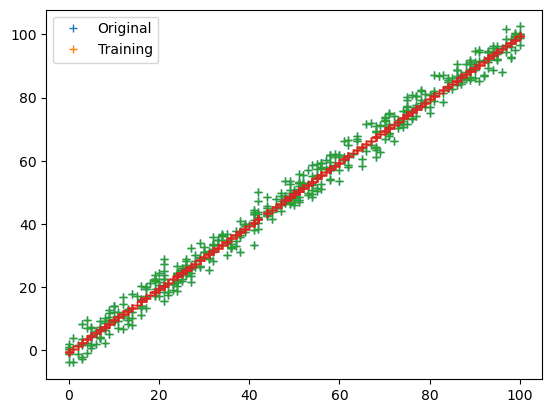

iteration =16,loss=[[1.90790376e+00]
 [2.13193114e+00]
 [3.71273924e+00]
 [4.33138415e-01]
 [2.60553292e-01]
 [4.65498240e+00]
 [2.51856264e-01]
 [2.04849978e-02]
 [5.86125404e-03]
 [3.07478725e+00]
 [9.06157628e+00]
 [1.92433146e+00]
 [6.05415677e-01]
 [3.89263722e-01]
 [1.29841796e+01]
 [2.33156951e+00]
 [1.01306719e+00]
 [2.30614542e+00]
 [3.46914560e-01]
 [1.35254483e+01]
 [1.09758748e+00]
 [1.23600034e+00]
 [1.22230683e-01]
 [4.32549110e+00]
 [1.43822484e-01]
 [1.15203041e-01]
 [1.62177678e-01]
 [1.17296601e+01]
 [1.30801636e+01]
 [1.31262164e-01]
 [6.47588816e+00]
 [3.15377059e+00]
 [3.28292711e-01]
 [3.61847619e-01]
 [2.84045042e+00]
 [9.74493386e-01]
 [4.37507535e-01]
 [1.19783317e-01]
 [2.18479738e+00]
 [2.02711717e+01]
 [1.07127050e+00]
 [2.92381166e-01]
 [9.70292094e+00]
 [5.99469952e+00]
 [1.71709449e+00]
 [3.94538347e-01]
 [3.00204241e-04]
 [2.63010008e+00]
 [6.61965328e+00]
 [3.28354759e+00]
 [1.31731752e+00]
 [3.96922346e-01]
 [7.42311544e-02]
 [3.60309089e+00]
 [8.87937

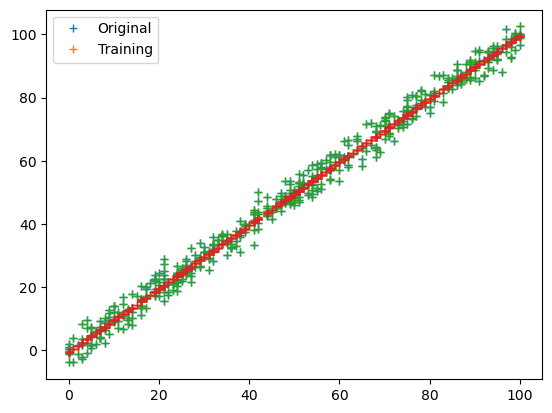

iteration =17,loss=[[1.97566820e+00]
 [2.28242967e+00]
 [3.65440428e+00]
 [4.85296787e-01]
 [1.78336959e-01]
 [4.81369941e+00]
 [2.64207007e-01]
 [3.72834155e-03]
 [2.62450456e-03]
 [3.05704714e+00]
 [9.15943423e+00]
 [1.96956874e+00]
 [5.68167507e-01]
 [3.41519771e-01]
 [1.33814553e+01]
 [2.14962044e+00]
 [9.60733863e-01]
 [2.53624811e+00]
 [3.13166708e-01]
 [1.37574518e+01]
 [9.57977910e-01]
 [1.43976030e+00]
 [1.66772687e-01]
 [4.55605587e+00]
 [2.15615798e-01]
 [1.58546359e-01]
 [2.04627361e-01]
 [1.15912740e+01]
 [1.24289162e+01]
 [9.83886817e-02]
 [6.45527853e+00]
 [3.24437464e+00]
 [2.81340886e-01]
 [3.61847619e-01]
 [2.63924135e+00]
 [1.16939970e+00]
 [3.86797455e-01]
 [1.24742723e-01]
 [2.12235286e+00]
 [2.08962939e+01]
 [9.02342013e-01]
 [2.92381166e-01]
 [9.34028586e+00]
 [5.90080654e+00]
 [1.81401341e+00]
 [4.19091602e-01]
 [1.80198734e-03]
 [2.46517431e+00]
 [6.52096855e+00]
 [3.16349628e+00]
 [1.12705029e+00]
 [4.55080591e-01]
 [7.70172010e-02]
 [3.37973191e+00]
 [8.79503

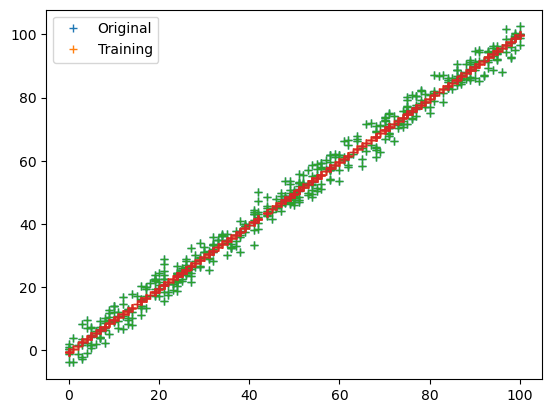

iteration =18,loss=[[2.02164254e+00]
 [2.38593270e+00]
 [3.61565300e+00]
 [5.21829469e-01]
 [1.32028075e-01]
 [4.92131910e+00]
 [2.72630980e-01]
 [3.82201725e-05]
 [1.17596150e-03]
 [3.04521284e+00]
 [9.22516578e+00]
 [2.00011247e+00]
 [5.43919156e-01]
 [3.11335249e-01]
 [1.36504565e+01]
 [2.03207334e+00]
 [9.26512503e-01]
 [2.69622343e+00]
 [2.91562585e-01]
 [1.39136949e+01]
 [8.69916463e-01]
 [1.58468583e+00]
 [2.00411477e-01]
 [4.71357627e+00]
 [2.71706668e-01]
 [1.91383579e-01]
 [2.35763950e-01]
 [1.14991924e+01]
 [1.20027004e+01]
 [7.90450213e-02]
 [6.44151505e+00]
 [3.30567812e+00]
 [2.51964403e-01]
 [3.61847619e-01]
 [2.50881495e+00]
 [1.30964178e+00]
 [3.54629461e-01]
 [1.28115241e-01]
 [2.08110089e+00]
 [2.13196141e+01]
 [7.97460484e-01]
 [2.92381166e-01]
 [9.10164241e+00]
 [5.83843312e+00]
 [1.88030827e+00]
 [4.35924041e-01]
 [6.79348716e-03]
 [2.35786652e+00]
 [6.45539086e+00]
 [3.08446448e+00]
 [1.00809296e+00]
 [4.96188984e-01]
 [7.89088862e-02]
 [3.23435740e+00]
 [8.73887

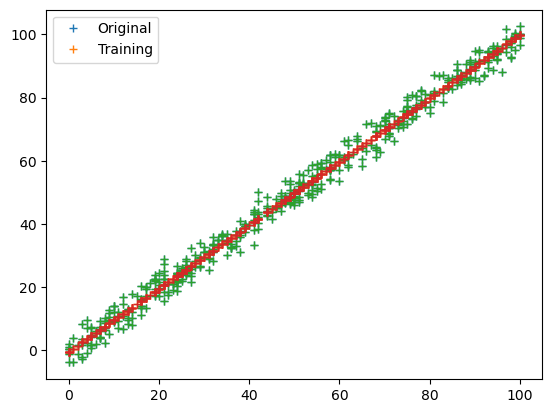

iteration =19,loss=[[2.05268094e+00]
 [2.45642643e+00]
 [3.58985498e+00]
 [5.46998755e-01]
 [1.04937847e-01]
 [4.99394897e+00]
 [2.78337908e-01]
 [9.31165261e-04]
 [5.27436431e-04]
 [3.03731196e+00]
 [9.26925206e+00]
 [2.02066840e+00]
 [5.27999137e-01]
 [2.91929700e-01]
 [1.38318331e+01]
 [1.95531267e+00]
 [9.03974682e-01]
 [2.80592961e+00]
 [2.77546514e-01]
 [1.40186681e+01]
 [8.13397560e-01]
 [1.68547543e+00]
 [2.24629025e-01]
 [4.82040487e+00]
 [3.12829133e-01]
 [2.15065111e-01]
 [2.57815008e-01]
 [1.14378216e+01]
 [1.17218357e+01]
 [6.72898892e-02]
 [6.43231951e+00]
 [3.34699232e+00]
 [2.33223661e-01]
 [3.61847619e-01]
 [2.42344181e+00]
 [1.40785271e+00]
 [3.33897550e-01]
 [1.30395565e-01]
 [2.05374128e+00]
 [2.16050598e+01]
 [7.30939546e-01]
 [2.92381166e-01]
 [8.94378285e+00]
 [5.79690847e+00]
 [1.92530393e+00]
 [4.47364919e-01]
 [1.19143134e-02]
 [2.28744127e+00]
 [6.41172349e+00]
 [3.03217314e+00]
 [9.32245996e-01]
 [5.24670085e-01]
 [8.01866748e-02]
 [3.13892739e+00]
 [8.70141

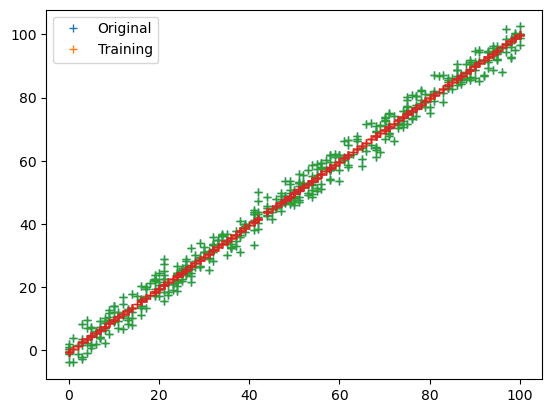

iteration =20,loss=[[2.07356847e+00]
 [2.50413869e+00]
 [3.57265520e+00]
 [5.64160374e-01]
 [8.85560264e-02]
 [5.04281393e+00]
 [2.82187154e-01]
 [3.03102153e-03]
 [2.36913621e-04]
 [3.03203431e+00]
 [9.29879151e+00]
 [2.03447294e+00]
 [5.17485234e-01]
 [2.79301442e-01]
 [1.39537889e+01]
 [1.90480681e+00]
 [8.89058310e-01]
 [2.88051148e+00]
 [2.68366489e-01]
 [1.40890845e+01]
 [7.76662048e-01]
 [1.75460777e+00]
 [2.41593967e-01]
 [4.89250981e+00]
 [3.41944133e-01]
 [2.31671615e-01]
 [2.73110637e-01]
 [1.13968741e+01]
 [1.15358746e+01]
 [5.99568580e-02]
 [6.42617405e+00]
 [3.37476258e+00]
 [2.21095621e-01]
 [3.61847619e-01]
 [2.36717672e+00]
 [1.47550804e+00]
 [3.20382343e-01]
 [1.31931657e-01]
 [2.03554672e+00]
 [2.17969984e+01]
 [6.88072629e-01]
 [2.92381166e-01]
 [8.83899153e+00]
 [5.76922333e+00]
 [1.95568969e+00]
 [4.55098201e-01]
 [1.61359382e-02]
 [2.24094313e+00]
 [6.38260549e+00]
 [2.99745496e+00]
 [8.83181406e-01]
 [5.44159025e-01]
 [8.10468672e-02]
 [3.07590994e+00]
 [8.67640

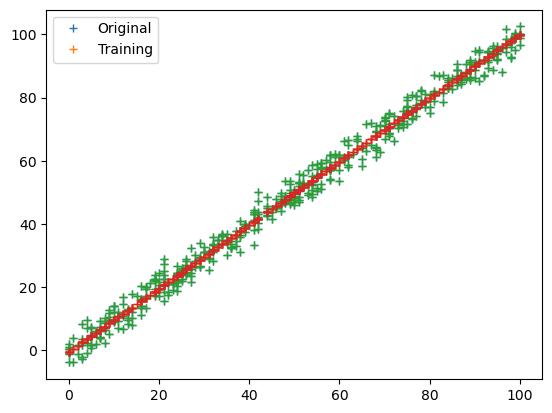

In [13]:
parameters,loss = train(train_input,train_output,0.0001,20)